# Using the Exploratory Functions

This notebook contains examples of how to use the Exploratory module to do exploratory data analysis on your data.

In [1]:
from eagles.data_sets import data_loader as dl
from eagles.Exploratory import explore, missing, distributions
from eagles.Exploratory.utils import plot_utils as pu

import numpy as np

In [2]:
wines = dl.load_wines()
print(wines.shape)

(178, 14)


To make the data a little more realistic I'll add in some missing data.

In [3]:
wines = wines.mask(np.random.random(wines.shape) < .1)

## Missing Data

In [4]:
msg_df = missing.get_proportion_missing(df=wines, cols=[])

,feature,percent_missing
4,alcalinity_of_ash,14.606742
8,nonflavanoid_phenols,14.044944
9,proanthocyanins,12.359551
0,class,10.112360
7,flavanoids,10.112360
12,OD280_OD315_of_diluted_wines,9.550562
1,alcohol,8.988764
6,total_phenols,8.988764
10,color_intensity,8.988764
11,hue,8.988764


If you would like a plot as well to see if there are any trends in the missing data you can simply set plot=True

,feature,percent_missing
4,alcalinity_of_ash,14.606742
8,nonflavanoid_phenols,14.044944
9,proanthocyanins,12.359551
0,class,10.112360
7,flavanoids,10.112360
12,OD280_OD315_of_diluted_wines,9.550562
1,alcohol,8.988764
6,total_phenols,8.988764
10,color_intensity,8.988764
11,hue,8.988764


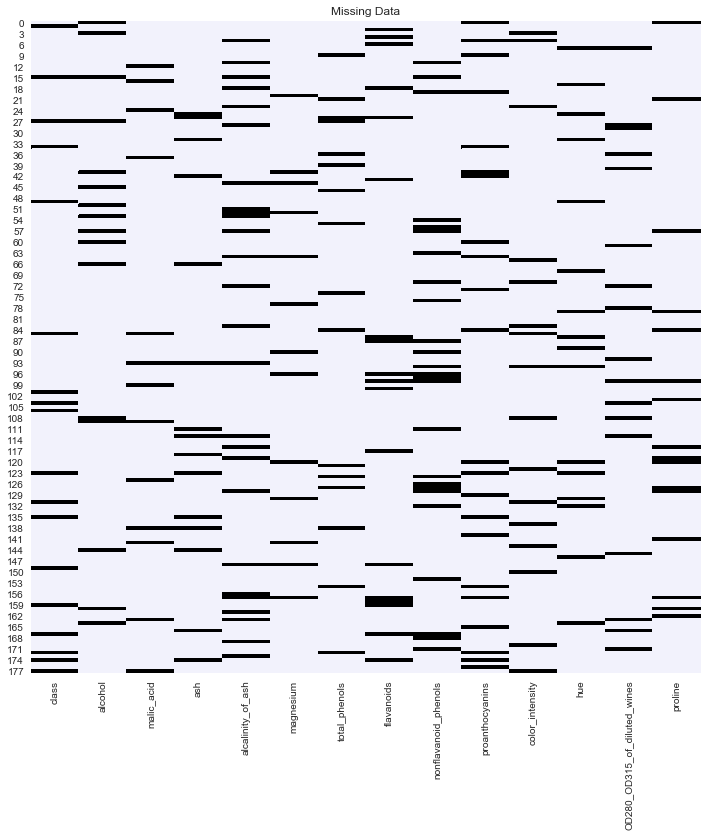

In [5]:
msg_df = missing.get_proportion_missing(df=wines, cols=[], plot=True)

## Get the base descriptive stats

In [6]:
descipt_df = explore.get_base_descriptives(data=wines)

,feature,mean,median,std,min,max,skew
0,class,1.912500,2.000,0.763866,1.00,3.00,0.149476
1,alcohol,12.982654,13.010,0.810777,11.03,14.83,-0.029003
2,malic_acid,2.327030,1.830,1.129417,0.74,5.80,1.086671
3,ash,2.368589,2.360,0.267556,1.36,3.23,-0.321007
4,alcalinity_of_ash,19.501974,19.500,3.377496,10.60,30.00,0.152938
5,magnesium,99.303030,98.000,14.149215,70.00,162.00,1.172653
6,total_phenols,2.268827,2.265,0.623844,0.98,3.88,0.144024
7,flavanoids,2.036250,2.155,0.992687,0.34,5.08,-0.011848
8,nonflavanoid_phenols,0.371634,0.340,0.123584,0.13,0.66,0.414618
9,proanthocyanins,1.604231,1.560,0.583510,0.42,3.58,0.553070


## Looking at Distributions and Potential Caps

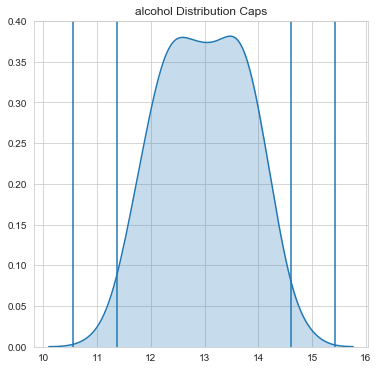

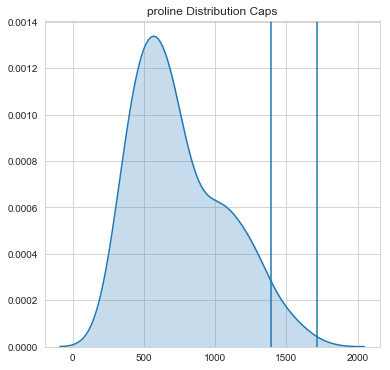

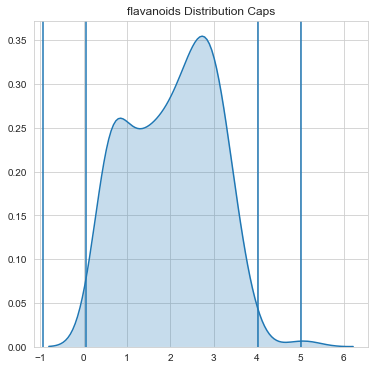

,Feature,plus_2_SD,plus_3_SD,minus_2_SD,minus_3_SD,skew
0,alcohol,14.604209,15.414987,11.361100,10.550322,-0.029003
1,proline,1395.850308,1715.559412,NaN,NaN,0.721476
2,flavanoids,4.021624,5.014311,0.050876,-0.941811,-0.011848


In [7]:
caps_df = distributions.find_caps(df=wines, cols=['alcohol', 'proline', 'flavanoids'], stats=['sd'] ,plot=True)

## Batteries

The run_battery() function allows you to run multiple test by simply calling the explore.run_battery() function. When no tests are passed into the tests parameter all available tests are run

,feature,percent_missing
3,alcalinity_of_ash,14.606742
7,nonflavanoid_phenols,14.044944
8,proanthocyanins,12.359551
6,flavanoids,10.112360
11,OD280_OD315_of_diluted_wines,9.550562
0,alcohol,8.988764
5,total_phenols,8.988764
9,color_intensity,8.988764
10,hue,8.988764
12,proline,8.988764


,feature,mean,median,std,min,max,skew
0,alcohol,12.982654,13.010,0.810777,11.03,14.83,-0.029003
1,malic_acid,2.327030,1.830,1.129417,0.74,5.80,1.086671
2,ash,2.368589,2.360,0.267556,1.36,3.23,-0.321007
3,alcalinity_of_ash,19.501974,19.500,3.377496,10.60,30.00,0.152938
4,magnesium,99.303030,98.000,14.149215,70.00,162.00,1.172653
5,total_phenols,2.268827,2.265,0.623844,0.98,3.88,0.144024
6,flavanoids,2.036250,2.155,0.992687,0.34,5.08,-0.011848
7,nonflavanoid_phenols,0.371634,0.340,0.123584,0.13,0.66,0.414618
8,proanthocyanins,1.604231,1.560,0.583510,0.42,3.58,0.553070
9,color_intensity,5.063765,4.690,2.341145,1.28,13.00,0.884329


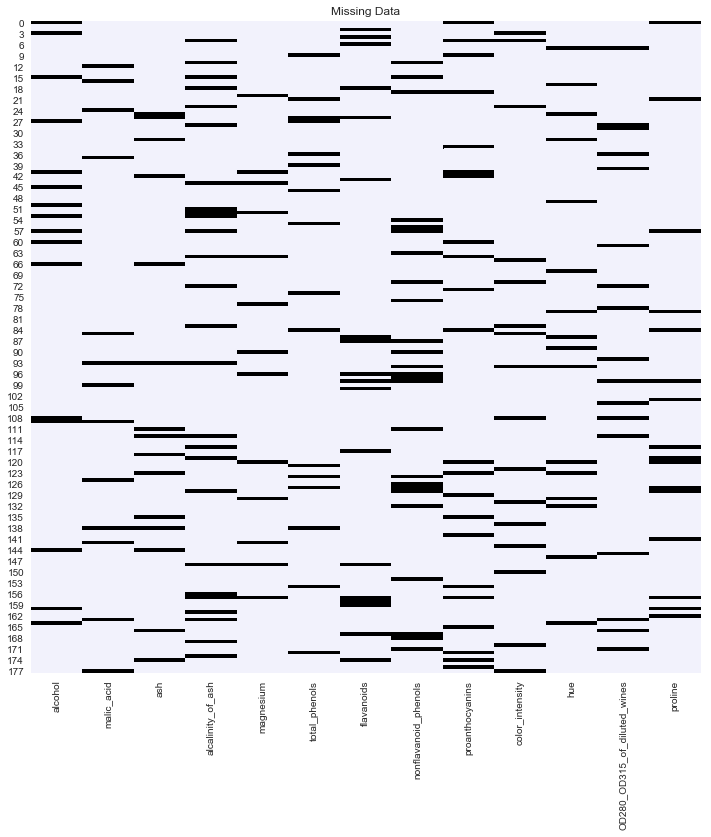

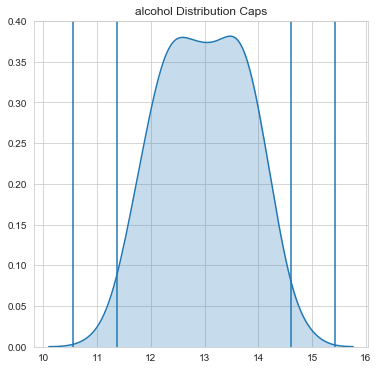

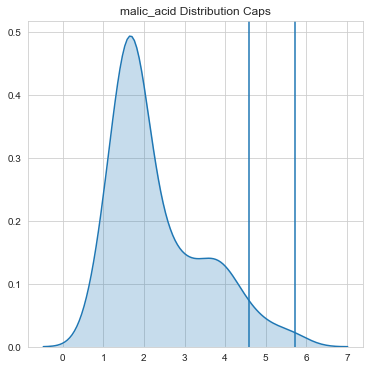

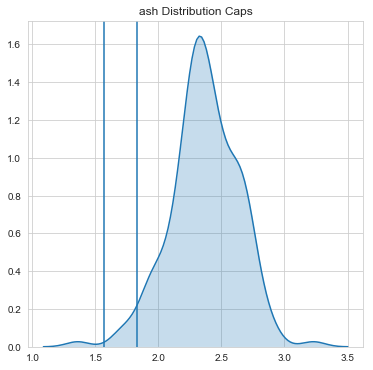

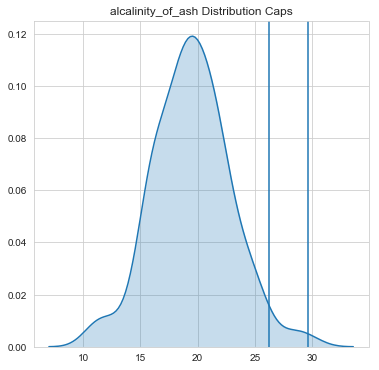

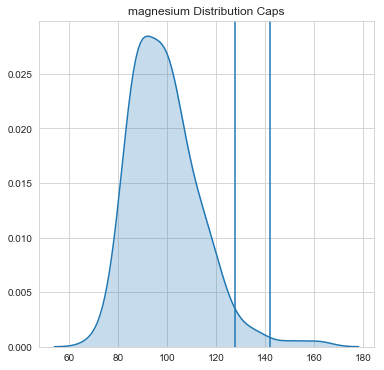

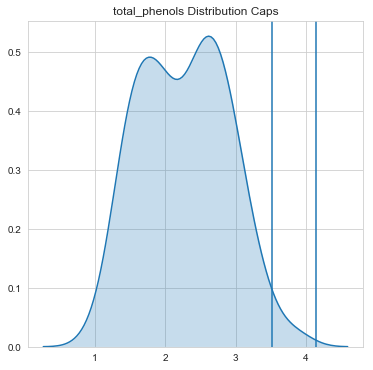

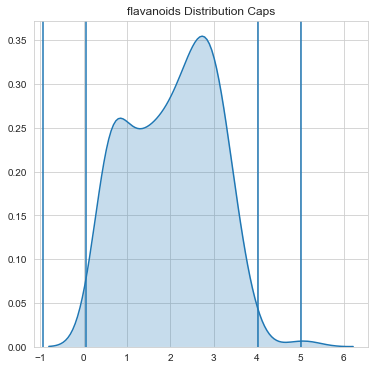

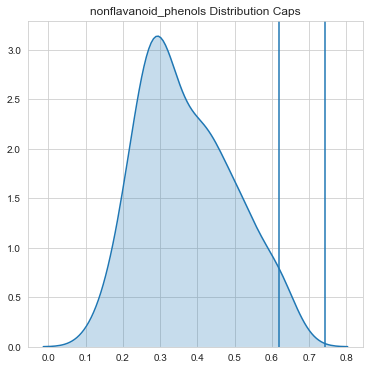

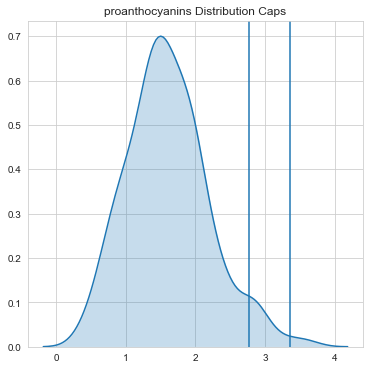

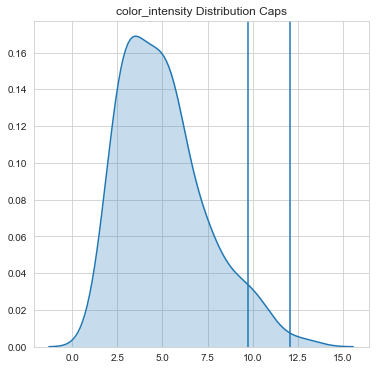

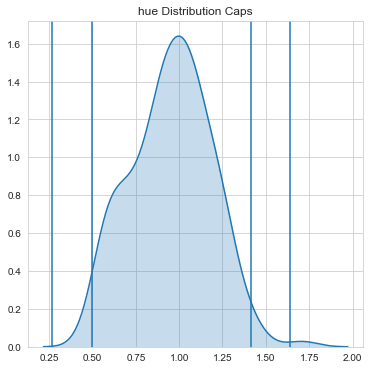

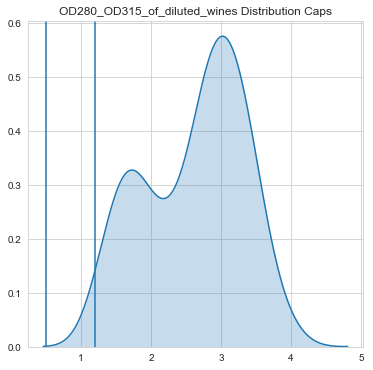

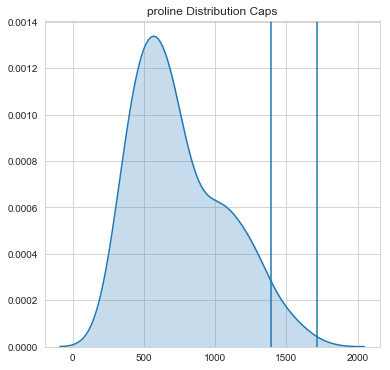

,Feature,plus_2_SD,plus_3_SD,minus_2_SD,minus_3_SD,skew
0,alcohol,14.604209,15.414987,11.361100,10.550322,-0.029003
1,malic_acid,4.585865,5.715282,NaN,NaN,1.086671
2,ash,NaN,NaN,1.833477,1.565921,-0.321007
3,alcalinity_of_ash,26.256966,29.634462,NaN,NaN,0.152938
4,magnesium,127.601461,141.750676,NaN,NaN,1.172653
5,total_phenols,3.516516,4.140360,NaN,NaN,0.144024
6,flavanoids,4.021624,5.014311,0.050876,-0.941811,-0.011848
7,nonflavanoid_phenols,0.618802,0.742386,NaN,NaN,0.414618
8,proanthocyanins,2.771251,3.354761,NaN,NaN,0.553070
9,color_intensity,9.746055,12.087200,NaN,NaN,0.884329


In [8]:
test_dict = explore.run_battery(data=wines, cols=[col for col in wines.columns if col != 'class'])